# Word count and accuracy

Every day people write something with mobile phones or laptops and most of the content people produce is not numbers, but words.

Recent studies have been conducted on the text and there are many resources such as blogs, twitter or even reviews. In general, 

it is not easy to create data from the text for machine learning training. A single sentence is composed of many embedded words for the sentence. 

However, the size of training data grows with the embedded words. This paper discusses how to define the number of words for natural language data.

In [ ]:
# Import data
import matplotlib.pyplot as plt
import pandas as pd 
import re

data = pd.read_csv('/kaggle/input/imdb-dataset-of-50k-movie-reviews/IMDB Dataset.csv')

Natural language data has wide variety of grammar issues and requires many preprocessing tasks. 

Each record had already a sentiment label, positive or negative. 

Most of the sentences have more than 100 words. 

This data has not only words but also punctuation and symbols. Before processing, it is necessary to clean the data. 

In [ ]:
# Preprocessing
from nltk.stem import PorterStemmer

# Cleansing
def clean_text(string):
    string = re.sub(pattern= '<[^>]*>', repl='', string=string)   # remove tags
    string = re.sub(pattern= '[^\w\s]',  repl='', string=string)  # remove symbols
    return string

# Stemming
def stemming_text(string):
    s = PorterStemmer()
    string = string.split()
    string = " ".join([s.stem(w) for w in string])
    return string

def category(v):
    if v =='positive': 
        return 1
    else:
        return 0

# Preprocessing
for i,d in enumerate(data['review']):
    string = d.lower()
    string = clean_text(string)
    #string = stemming_text(string)   //Removing stemming shows better performance
    data.iloc[i, 0] =  string


In [ ]:
import re

word_dict = {}

number = 0 
for d in data['review']:
    sent = d.split(' ')
    for w in sent:
        if w in word_dict:
            word_dict[w][1] +=1
        else:
            word_dict[w] = [number, 1]
            number+=1
        
        

###################################################################
# New Hyper parameters
S = len(data)
low  = 0.05*S
high = 1.0*S

# Make Smaller Dictionary
###################################################################
word_dict2 = {}
number = 0
for w in word_dict:
    if low < word_dict[w][1] < high:
        word_dict2[w] = word_dict[w]
        word_dict2[w][0] = number
        number+=1

print("The number of total words : ", len(word_dict))
print("The number of new   words : ", len(word_dict2))

In [ ]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def category(v):
    if v =='positive': 
        return 1
    else:
        return 0

y = np.array(list(map(category, data['sentiment'])))
x = np.zeros((len(data), len(word_dict2)))

# Make X
for i, d in enumerate(data['review']):
    sent = d.split(' ')
    for w in sent:
        try:
            index  = word_dict2[w][0]
            x[i, index] +=1   
        except:
            pass

        
# Normalize
scaler = MinMaxScaler()
scaler.fit(x)
x = scaler.transform(x)
print(f"Shape X:{x.shape}")
print(f"Shape y:{y.shape}")

In [ ]:
# Models 
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3,random_state=0)


svc = LinearSVC(random_state=0, tol=1e-5, verbose=0)
gaunb = GaussianNB()
dt = tree.DecisionTreeClassifier()
rf = RandomForestClassifier()

# Training 


svc.fit(X_train, y_train).decision_function(X_test)
print(f"SVC Accuracy: {accuracy_score(svc.predict(X_test),y_test)}")
gaunb.fit(X_train, y_train)
print(f"GNB Accuracy: {accuracy_score(gaunb.predict(X_test),y_test)}")
dt.fit(X_train, y_train)
print(f"DT Accuracy: {accuracy_score(dt.predict(X_test),y_test)}")
rf.fit(X_train, y_train)
print(f"RF Accuracy: {accuracy_score(rf.predict(X_test),y_test)}")

# Results

I tried many kinds of smaller word frequency and post the result graph

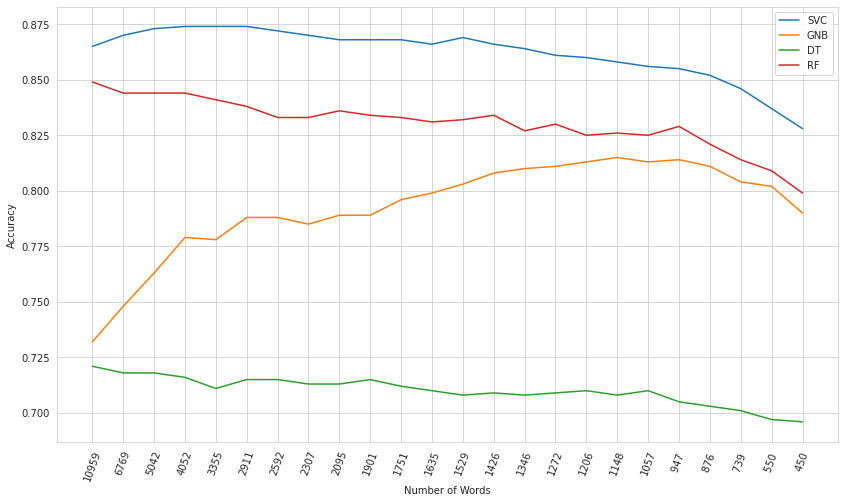

The **SVM’s performance was the best**, and other machine learning models predicted label correctly in the order of RF, GNB, and DT. 

It should be noted that, when the number of words is 10K or 1K, the difference in accuracy was not so large despite 10 times more words (0.87 with 10K words and 0.85 with 1K words). 

This means that removing words with low frequency does not significantly affect the performance. Furthermore, in the case of Gaussian Naïve Bayes, the more words you use the worse the performance is. The 87.4 percent performance of SVM which reduced the word count to 4K, based on the total word count of 223K, is the best. 

This analysis suggests that it is possible to obtain meaningful performance even if you generate data based on frequently occurring words


Thanks 😋